# Example: Holdout set
----------------------

This example shows when and how to use ATOM's holdout set in an exploration pipeline.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  MelbourneAirport     18.0     26.9      21.4          7.0       8.9   
1          Adelaide     17.2     23.4       0.0          NaN       NaN   
2            Cairns     18.6     24.6       7.4          3.0       6.1   
3          Portland     13.6     16.8       4.2          1.2       0.0   
4           Walpole     16.4     19.9       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0         SSE           41.0          W        SSE  ...         95.0   
1           S           41.0          S        WSW  ...         59.0   
2         SSE           54.0        SSE         SE  ...         78.0   
3         ESE           39.0        ESE        ESE  ...         76.0   
4          SE           44.0         SE         SE  ...         78.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         54.0       1019.5       1017.0       8.0       5.0     18.5   
1         36.0       1015.7       1015.7       NaN       NaN     17.7   
2         57.0       1018.7       1016.6       3.0       3.0     20.8   
3         74.0       1021.4       1020.5       7.0       8.0     15.6   
4         70.0       1019.4       1018.9       NaN       NaN     17.4   

   Temp3pm  RainToday  RainTomorrow  
0     26.0        Yes             0  
1     21.9         No             0  
2     24.1        Yes             0  
3     16.0        Yes             1  
4     18.1         No             0  

[5 rows x 22 columns]

## Run the pipeline

In [3]:
# Initialize atom specifying a fraction of the dataset for holdout
atom = ATOMClassifier(X, n_rows=0.5, holdout_size=0.2, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (56877, 22)
Memory: 24.67 MB
Scaled: False
Missing values: 127804 (10.2%)
Categorical features: 5 (23.8%)
Duplicate samples: 13 (0.0%)
-------------------------------------
Train set size: 42658
Test set size: 14219
Holdout set size: 14219
-------------------------------------
|   |       dataset |         train |          test |
| - | ------------- | ------------- | ------------- |
| 0 |   44085 (3.4) |   33064 (3.4) |   11021 (3.4) |
| 1 |   12792 (1.0) |    9594 (1.0) |    3198 (1.0) |



In [4]:
# The test and holdout fractions are split after subsampling the dataset
# Also note that the holdout data set is not a part of atom's dataset
print("Length loaded data:", len(X))
print("Length dataset + holdout:", len(atom.dataset) + len(atom.holdout))

Length loaded data: 142193
Length dataset + holdout: 71096


In [5]:
atom.impute()
atom.encode()

Fitting Imputer...
Imputing missing values...
 --> Dropping 265 samples due to missing values in feature MinTemp.
 --> Dropping 134 samples due to missing values in feature MaxTemp.
 --> Dropping 567 samples due to missing values in feature Rainfall.
 --> Dropping 24603 samples due to missing values in feature Evaporation.
 --> Dropping 27348 samples due to missing values in feature Sunshine.
 --> Dropping 3748 samples due to missing values in feature WindGustDir.
 --> Dropping 3724 samples due to missing values in feature WindGustSpeed.
 --> Dropping 4044 samples due to missing values in feature WindDir9am.
 --> Dropping 1518 samples due to missing values in feature WindDir3pm.
 --> Dropping 550 samples due to missing values in feature WindSpeed9am.
 --> Dropping 1062 samples due to missing values in feature WindSpeed3pm.
 --> Dropping 749 samples due to missing values in feature Humidity9am.
 --> Dropping 1464 samples due to missing values in feature Humidity3pm.
 --> Dropping 5630 s

In [6]:
# Unlike train and test, the holdout data set is not transformed until used for predictions
atom.holdout

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         SalmonGums      7.4     13.5       1.6          NaN       NaN   
1        MountGinini     -0.5      1.8       0.0          NaN       NaN   
2           Watsonia      8.2     24.5       0.0          5.2      11.1   
3        Williamtown     16.1     22.6       1.8          1.8       0.3   
4         PearceRAAF     13.9     24.6       0.6          NaN      11.9   
...              ...      ...      ...       ...          ...       ...   
14214   CoffsHarbour      5.4     20.8       0.0          2.2      10.3   
14215  BadgerysCreek      3.2     17.6       0.0          NaN       NaN   
14216         Albany     15.5     23.6       0.0          7.4       9.2   
14217  SydneyAirport     15.3     33.5       0.0          8.0      10.6   
14218     WaggaWagga     23.7     34.8       0.0         14.8       NaN   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0              NW           22.0         SE          W  ...         92.0   
1              NE           37.0        ENE        ENE  ...         97.0   
2             SSW           30.0        NaN        SSW  ...         92.0   
3               E           41.0          E        ENE  ...         65.0   
4             WSW           44.0         SW         SW  ...         66.0   
...           ...            ...        ...        ...  ...          ...   
14214          NE           39.0         SW         NE  ...         78.0   
14215          SW           28.0        WSW          S  ...         80.0   
14216         NaN            NaN          E        ESE  ...         71.0   
14217          NW           41.0          N         NW  ...         26.0   
14218         WSW           43.0        WSW        WSW  ...         45.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             93.0          NaN          NaN       NaN       NaN     12.0   
1             88.0          NaN          NaN       NaN       NaN      0.5   
2             40.0       1024.5       1023.1       1.0       3.0     11.3   
3             76.0       1029.2       1028.3       7.0       8.0     21.1   
4             47.0       1006.7       1006.7       7.0       4.0     18.8   
...            ...          ...          ...       ...       ...      ...   
14214         61.0       1023.6       1020.6       0.0       1.0     14.5   
14215         47.0       1019.3       1017.9       NaN       NaN      9.9   
14216         70.0       1020.5       1016.1       2.0       3.0     17.5   
14217         14.0       1014.2       1010.7       2.0       0.0     25.1   
14218         35.0       1009.4       1008.9       1.0       2.0     28.9   

       Temp3pm  RainToday  RainTomorrow  
0         11.2        Yes             1  
1          0.9         No             0  
2         24.2         No             0  
3         20.2        Yes             1  
4         23.0         No             0  
...        ...        ...           ...  
14214     20.2         No             1  
14215     16.6         No             0  
14216     21.5         No             0  
14217     32.1         No             0  
14218     32.8         No             0  

[14219 rows x 22 columns]

In [7]:
atom.run(models=["GNB", "LR", "RF"])


Training ========================= >>
Models: GNB, LR, RF
Metric: f1


Results for GaussianNB:
Fit ---------------------------------------------
Train evaluation --> f1: 0.5989
Test evaluation --> f1: 0.6007
Time elapsed: 0.041s
-------------------------------------------------
Total time: 0.041s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.6062
Test evaluation --> f1: 0.6133
Time elapsed: 0.148s
-------------------------------------------------
Total time: 0.148s


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.6229
Time elapsed: 2.744s
-------------------------------------------------
Total time: 2.744s


Final results ==================== >>
Total time: 2.936s
-------------------------------------
GaussianNB         --> f1: 0.6007
LogisticRegression --> f1: 0.6133
RandomForest       --> f1: 0.6229 ~ !


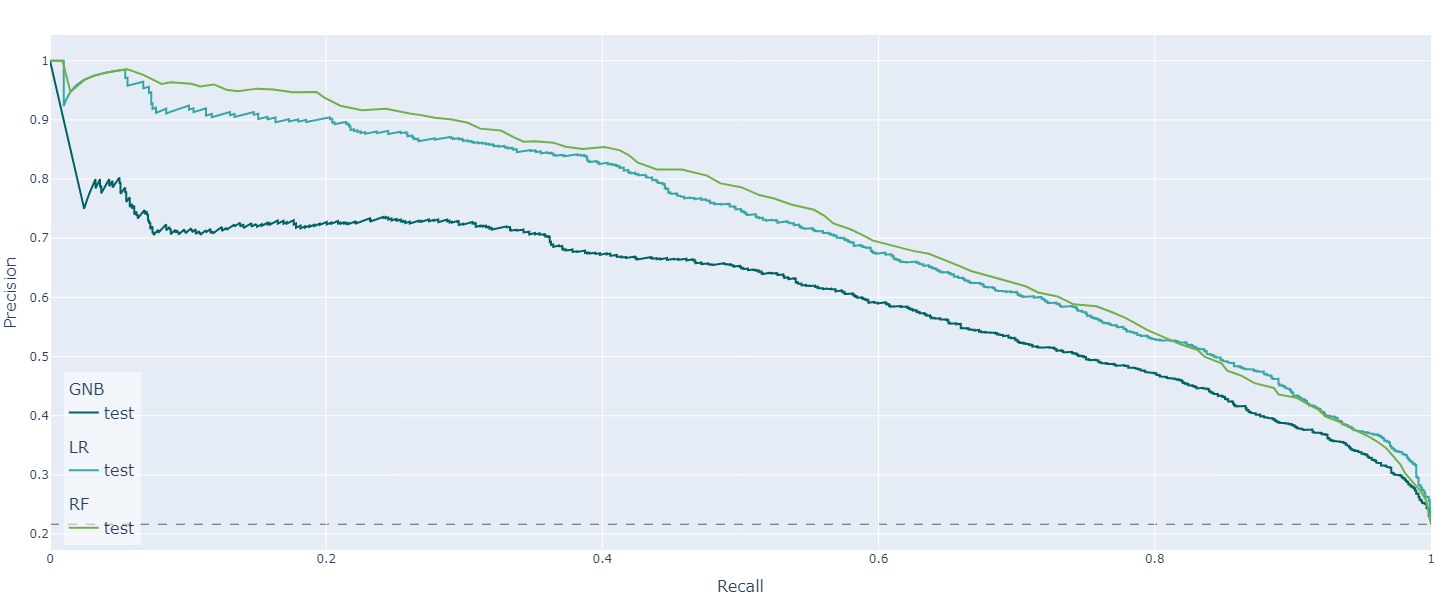

In [8]:
atom.plot_prc()

In [10]:
# Based on the results on the test set, we select the best model for further tuning
atom.run("lr_tuned", n_trials=10)


Training ========================= >>
Models: LR_tuned
Metric: f1


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio |      f1 | best_f1 | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ------- | ------- | ---------- | ------- | -------- |
| 0     |      l1 |  4.2668 |    saga |      920 |      --- |  0.6033 |  0.6033 |     0.692s |  0.692s | COMPLETE |
| 1     |    none |     --- |    saga |     1000 |      --- |  0.6102 |  0.6102 |     0.901s |  1.592s | COMPLETE |
| 2     |      l2 |  0.0295 | newto.. |      230 |      --- |  0.5737 |  0.6102 |     0.593s |  2.185s | COMPLETE |
| 3     |      l2 |   0.038 | newto.. |      360 |      --- |  0.6161 |  0.6161 |     0.571s |  2.756s | COMPLETE |
| 4     |      l2 |  7.0752 |     sag |      260 |      --- |  0.5997 |  0.6161 |     0.697s |  3.452s | COMPLETE |
| 5     |      l2 |  0.0011 |     sag |      910 |      --- |  

## Analyze the results

We already used the test set to choose the best model for futher tuning, so this set is no longer truly independent. Although it may not be directly visible in the results, using the test set now to evaluate the tuned LR model would be a mistake, since it carries a bias. For this reason, we have set apart an extra, indepedent set to validate the final model: the holdout set. If we are not going to use the test set for validation, we might as well use it to train the model and so optimize the use of the available data. Use the full_train method for this.

In [11]:
# Re-train the model on the full dataset (train + test) 
atom.lr_tuned.full_train()

Fit ---------------------------------------------
Train evaluation --> f1: 0.6062
Test evaluation --> f1: 0.6123
Time elapsed: 0.356s


In [12]:
# Evaluate on the holdout set
atom.lr_tuned.evaluate(dataset="holdout")

accuracy             0.8555
average_precision    0.7229
balanced_accuracy    0.7436
f1                   0.6255
jaccard              0.4550
matthews_corrcoef    0.5485
precision            0.7396
recall               0.5418
roc_auc              0.8828
Name: LR_tuned, dtype: float64

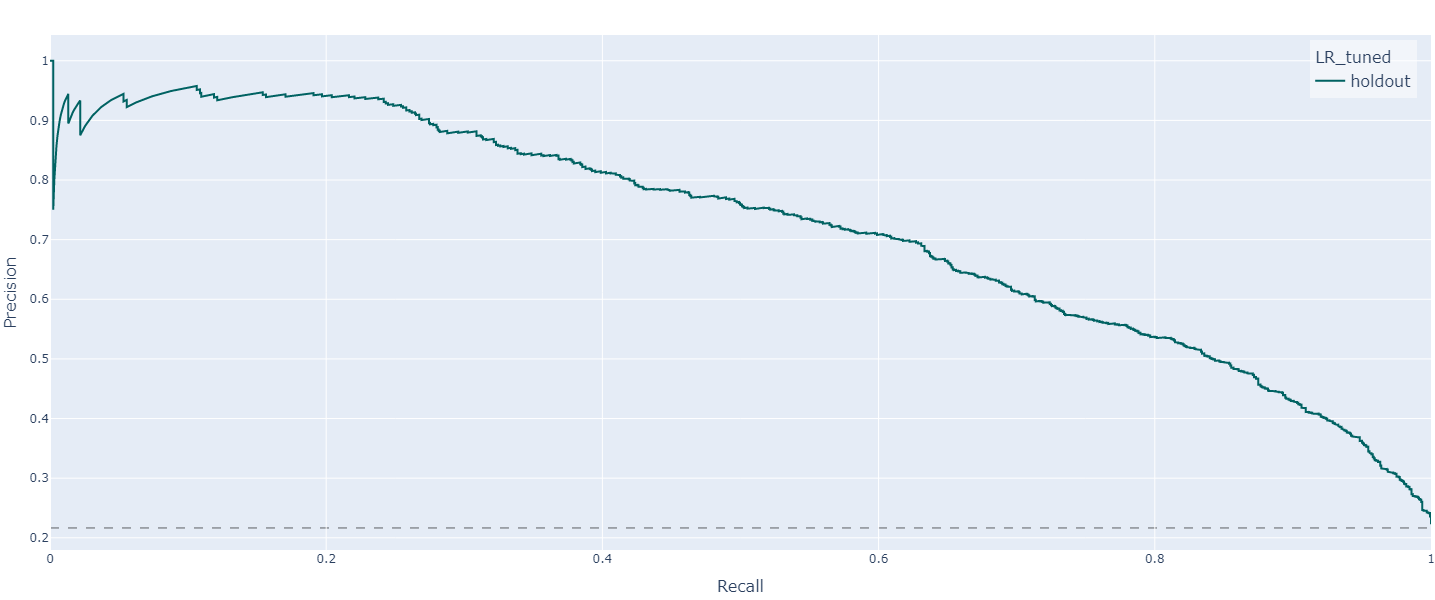

In [14]:
atom.lr_tuned.plot_prc(dataset="holdout", legend="upper right")